In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
# loading the pretrained models
from transformers import MBart50TokenizerFast
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base")
model.resize_token_embeddings(tokenizer.vocab_size) # change this because we used a different tokenizer than the pretrained one

Embedding(250054, 768, padding_idx=0)

In [25]:
import os
import torch
# load the saved weights
model.load_state_dict(torch.load(os.path.join(os.getcwd(), 'final_model')).state_dict())

<All keys matched successfully>

In [26]:
from transformers import AutoImageProcessor
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
processor = AutoImageProcessor.from_pretrained("microsoft/git-base")

In [30]:
# get the test image data
test_dataset = load_dataset("imagefolder", data_dir = os.path.join(os.getcwd(), 'data/output_test'), split="train") # doing train just so the data dont split
test_dataset

Resolving data files:   0%|          | 0/600 [00:00<?, ?it/s]

Dataset({
    features: ['image'],
    num_rows: 600
})

丛林中的一个瀑布


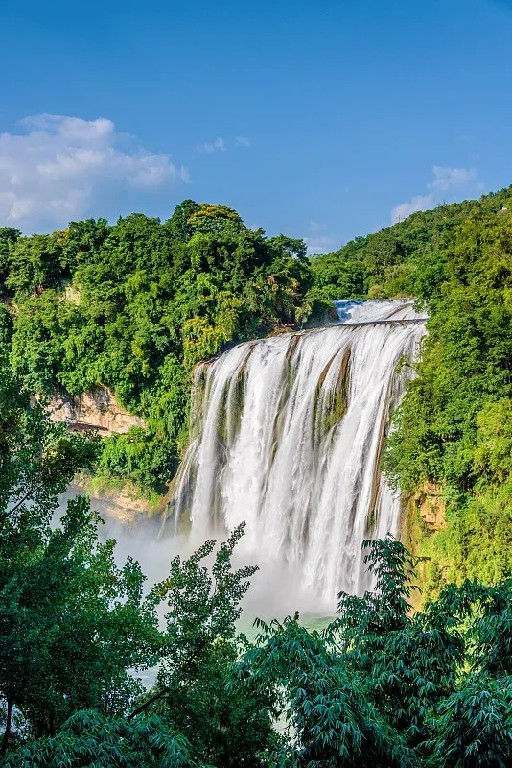

In [48]:
# this will generate the captions and display the image for a random image in the test dataset
import random 

i = random.randint(0, len(test_dataset)-1)
processed_test_image = processor(images=test_dataset['image'][i], return_tensors = 'pt')
generated_ids = model.generate(pixel_values=processed_test_image['pixel_values'].to(device), max_length = 10)
generated_caption = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

print(generated_caption[0].replace("_ ", ""))
test_dataset['image'][i]